In [1]:
# https://cvisiondemy.com/license-plate-detection-with-opencv-and-python/
import cv2
import numpy as np
import matplotlib.pyplot as plt

width: 523 pixels
height: 184 pixels
channels: 3


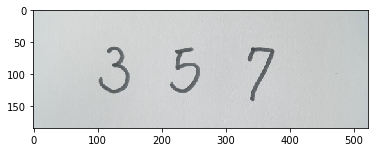

In [2]:
frame = 'digits_357.jpg'

img = cv2.imread(frame)
#plt.figure(figsize=(10,10))
plt.imshow(img);
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

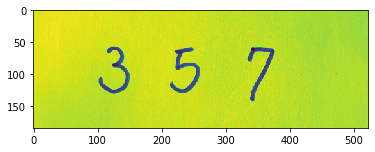

In [3]:
# hsv transform - value = gray image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv)
plt.imshow(value)

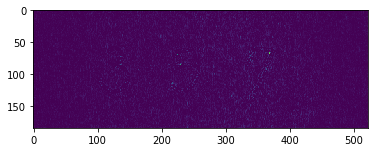

In [4]:
# kernel to use for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# applying topHat operations
topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)
plt.imshow(topHat)

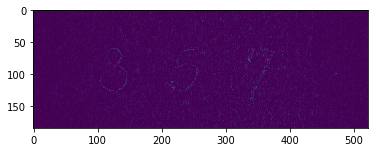

In [5]:
# applying blackHat operations
blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackHat)

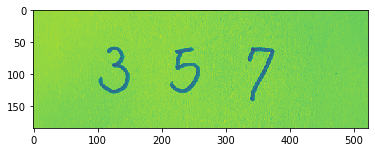

In [6]:
# add and subtract between morphological operations
add = cv2.add(value, topHat)
subtract = cv2.subtract(add, blackHat)
plt.imshow(subtract)

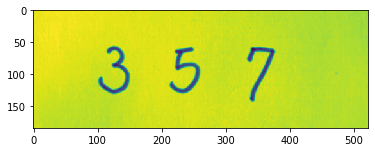

In [7]:
# applying gaussian blur on subtract image
blur = cv2.GaussianBlur(subtract, (5, 5), 0)
plt.imshow(blur)

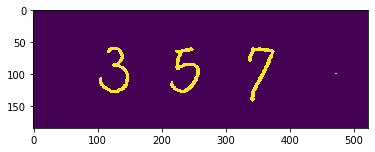

In [8]:
# thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 9)
plt.imshow(thresh)

In [9]:
# cv2.findCountours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv2.__version__.split(".")[0]
print('openCV version : ', cv2MajorVersion)
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
else:
    imageContours, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

openCV version :  4


334 378 58 143
214 260 58 129
103 150 57 130


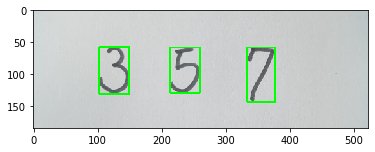

In [10]:
img_digits = []
img_origin = img.copy()
margin = 10

# loop to check if any (possible) contour is found
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  # Ignore if image is too small
  if w * h < 100: continue
  #Y and X [y-margin:y+h+margin, x-margin:x+w+margin]
  img_digits.append(img_origin[y-margin:y+h+margin, x-margin:x+w+margin])
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  print(x,  x+w, y, y+h)
plt.imshow(img)

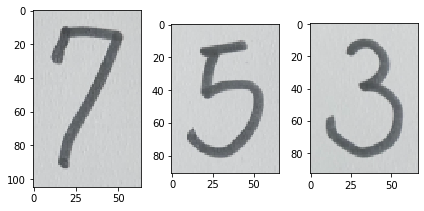

In [11]:
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(img_digits[i], cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show() 

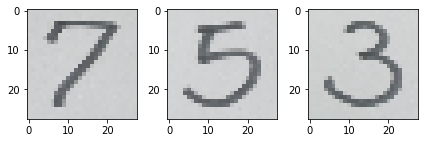

In [12]:
SZ = 28

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(cv2.resize(img_digits[i], (SZ, SZ)), cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show() 

Load Deep Learning Model

In [13]:
import tensorflow as tf

model = tf.keras.models.load_model('digits_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


[5.48386e-10, 5.4737143e-06, 0.07105445, 0.3119653, 4.2847254e-12, 0.061476547, 0.0001220771, 0.55533874, 3.7485075e-05, 4.490388e-12]
[6.02408e-09, 1.05932244e-07, 3.0170122e-07, 2.9829042e-05, 8.902825e-13, 0.999951, 5.180619e-08, 1.8662764e-05, 2.3581562e-08, 5.66723e-10]
[3.286913e-08, 8.9046145e-05, 0.005061699, 0.523382, 1.5468645e-11, 0.47041553, 2.2492993e-07, 0.0010352364, 1.6254813e-05, 5.62098e-10]


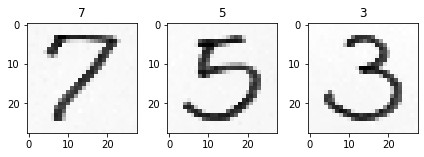

In [14]:
SZ = 28

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    num = cv2.resize(img_digits[i], (SZ,SZ))[:,:,1]
    num = 255 - num #Reverse 
    num = num.astype('float32') / 255.
    plt.imshow(num, cmap='Greys', interpolation='nearest');
    result = model.predict(np.array([num]))
    result_number = np.argmax(result)
    plt.title(result_number)
    performance = [ val for val in result[0]]
    print(performance)
plt.tight_layout()
plt.show()